In [1]:
%load_ext autoreload
%autoreload 2

2023-02-26 21:49:37.096884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 21:49:40.986181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



 ⏹ The color of the plane is snow

 ⏹ Working on axis shaped (18, 18)

 ⏹ Input array shaped (18, 18, 18)

 ⏹ ----------------------------

 ⏹ Output array shaped (18, 18, 18)

 ⏹ ----------------------------

 🔽 Plotting [26-02-2023-21-49-44]


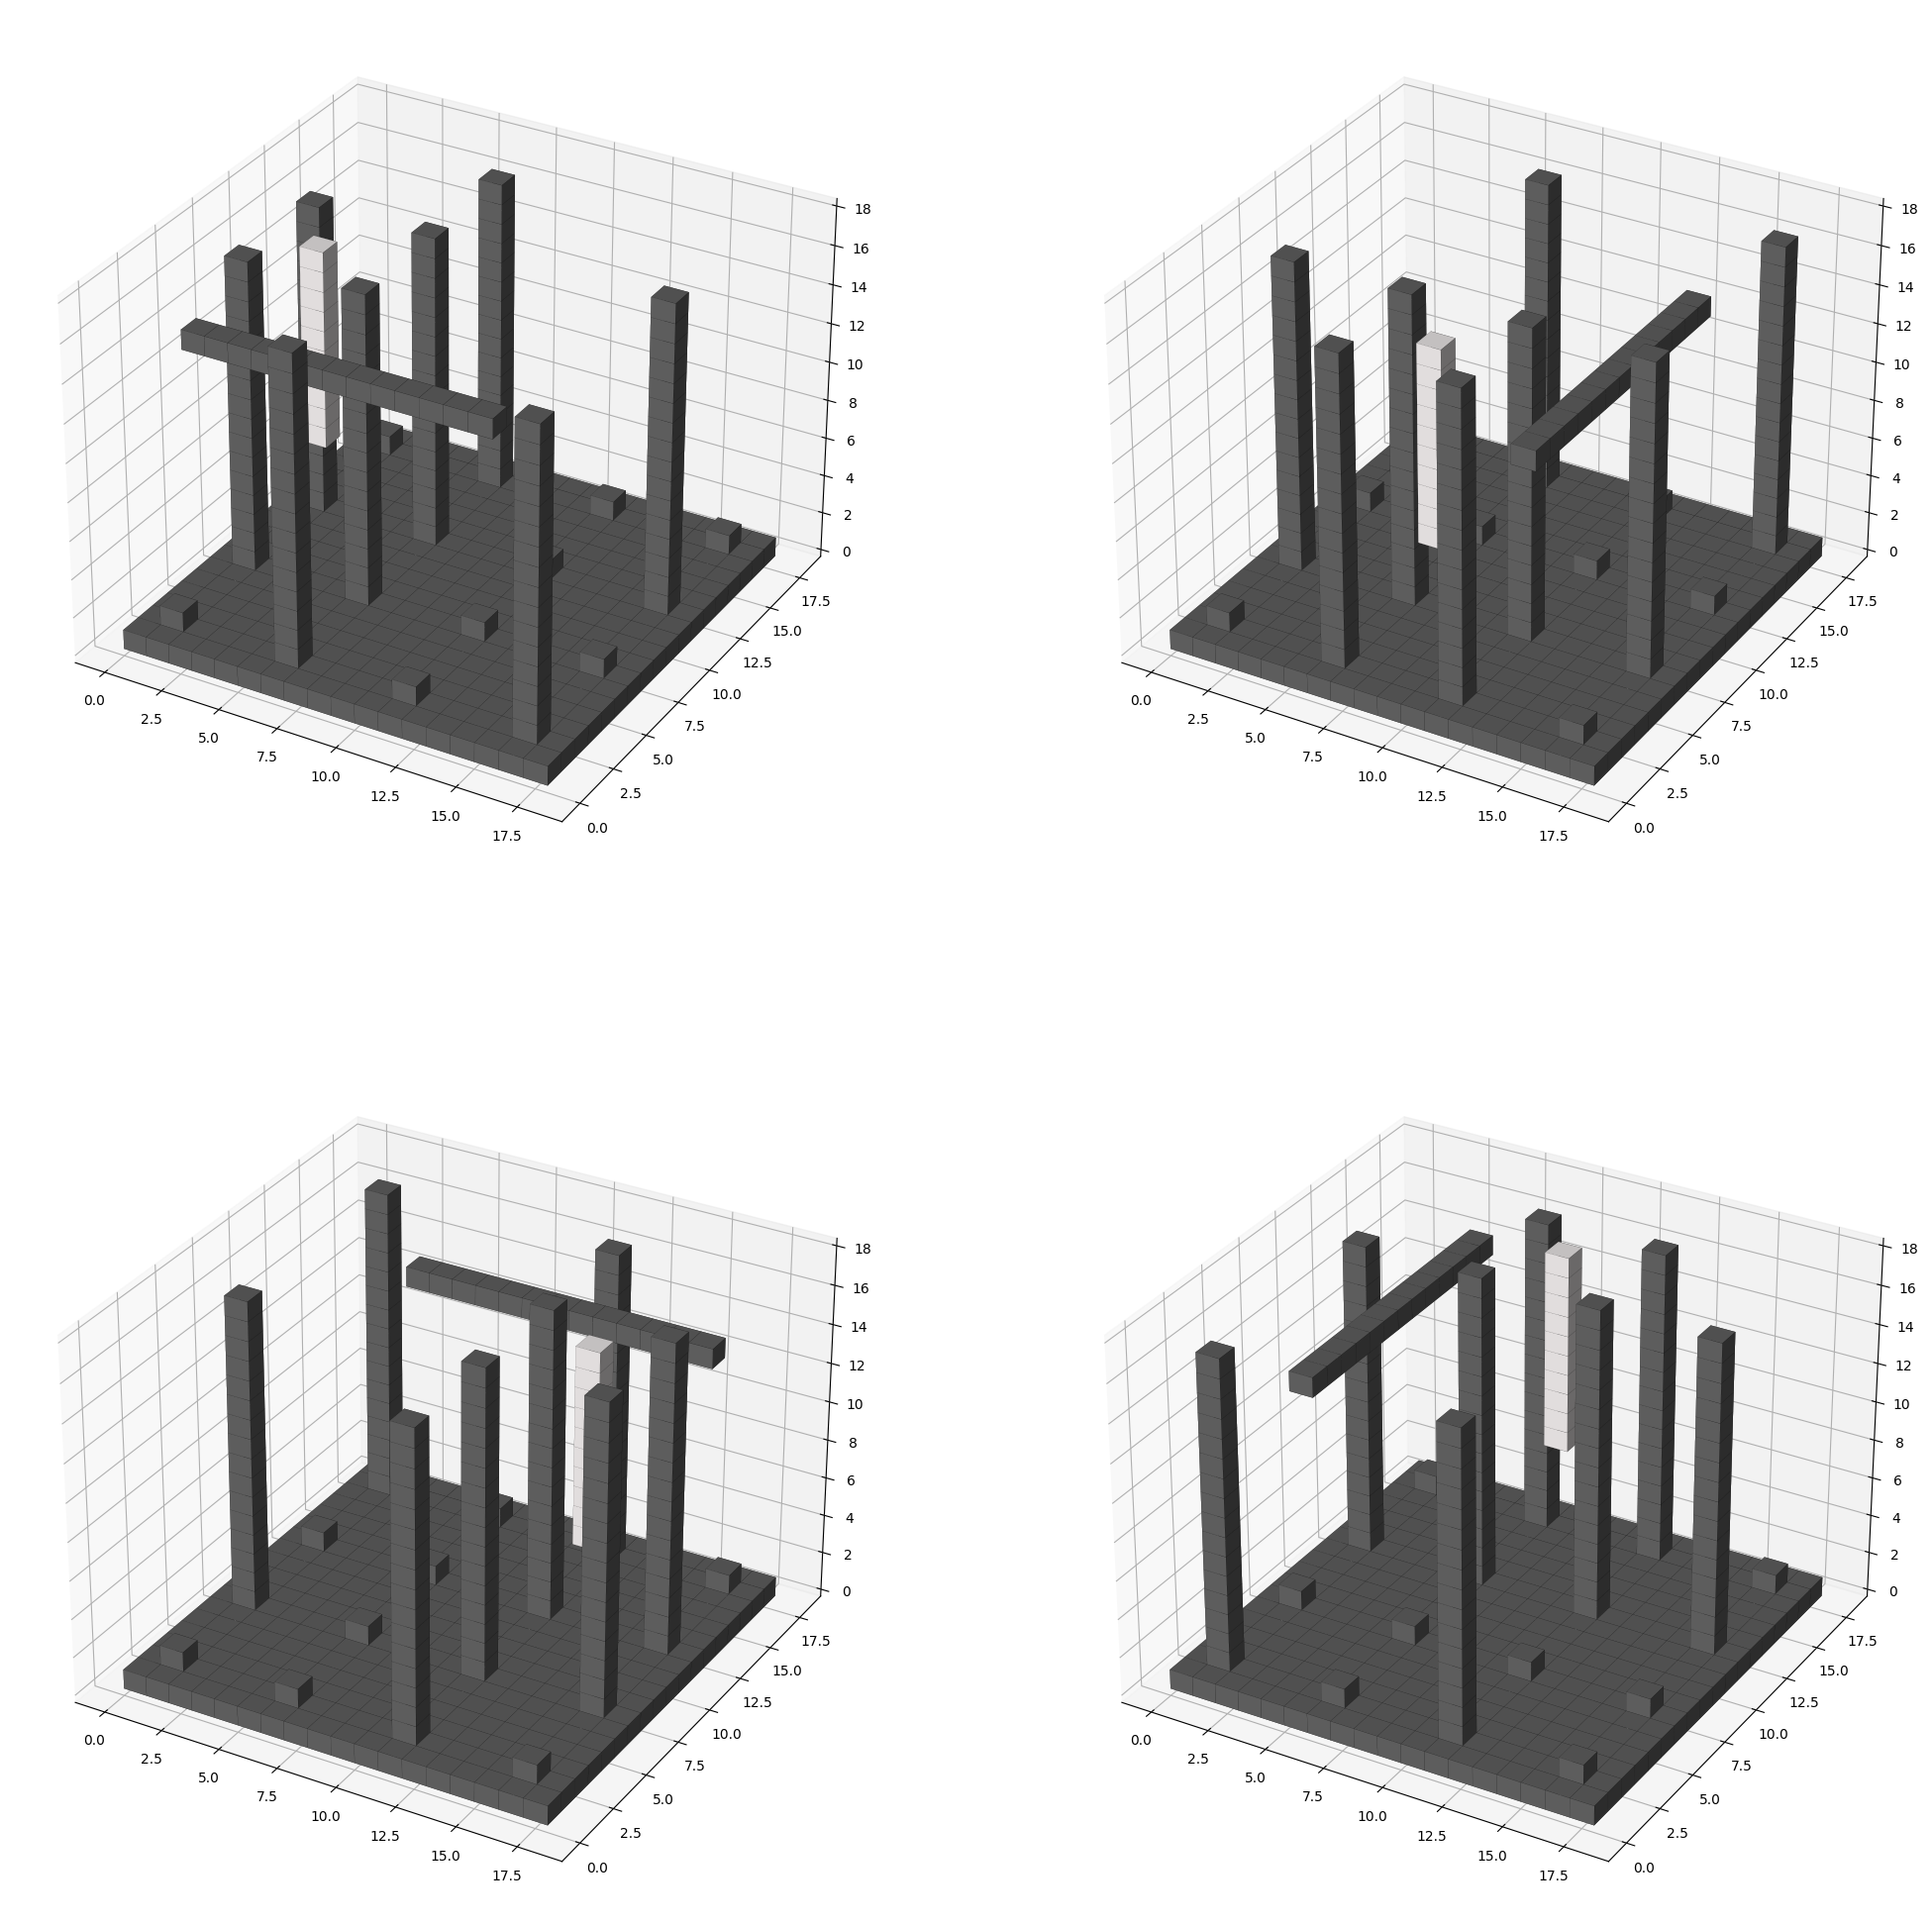

In [2]:
from deepSculpt.sculptor.components.grid_components import attach_grid
from deepSculpt.sculptor.components.plane_components import attach_plane
from deepSculpt.sculptor.components.edge_components import attach_edge
from deepSculpt.manager.tools.plotter import Plotter

import numpy as np
import os

void_dim = 18

volumes_void = np.zeros((void_dim, void_dim, void_dim))

materials_void = np.empty(volumes_void.shape, dtype=object)

separacion = 4

volumes_void, materials_void = attach_grid(volumes_void=volumes_void, materials_void=materials_void, step=separacion, verbose=False)

volumes_void, materials_void = attach_plane(volumes_void,
                                             materials_void,
                                             0.1,
                                             0.9,
                                             3,
                                             verbose=True)

volumes_void, materials_void = attach_edge(volumes_void,
                                        materials_void,
                                        0.1,
                                        0.9,
                                        3,
                                        verbose=True)

plot = Plotter(volumes=volumes_void, colors=materials_void)

out_dir = os.path.join(
                    os.environ.get("HOME"),
                    "code",
                    "juan-garassino",
                    "deepSculpt", "results"
                )

plot.plot_sculpture(out_dir)

In [3]:
from deepSculpt.manager.tools.params import COLORS
from deepSculpt.sculptor.sculptor import Sculptor
from deepSculpt.manager.tools.plotter import Plotter

import os

sculptor = Sculptor(
    void_dim=32,
    edges=(30, 0.9, 0.95),  # number of elements, minimun, maximun
    planes=(5, 0.4, 0.5),
    volumes=(3, 0.3, 0.9),
    grid=(1, 4),  # minimun height of column, and maximun height
    materials_edges=COLORS['edges'],
    materials_planes=COLORS['planes'],
    materials_volumes=COLORS['volumes'],
    step=6,
)

volumes, materials = sculptor.generative_sculpt()

plot = Plotter(volumes=volumes, colors=materials)

out_dir = os.path.join(
                    os.environ.get("HOME"),
                    "code",
                    "juan-garassino",
                    "deepSculpt", 'results'
                )

# plot.plot_sculpture(out_dir)

In [4]:
import numpy as np


def voxels_point_cloud(array):
    # Get the shape of the array
    shape = array.shape

    # Create a meshgrid of indices
    x, y, z = np.meshgrid(range(shape[0]),
                          range(shape[1]),
                          range(shape[2]),
                          indexing='ij')

    # Get the indices where the array is equal to 1
    indices = np.argwhere(array == 1)

    # Create the vertices of the cube centered on each index
    vertices = []
    for i, j, k in indices:
        vertices.extend(
            [[x[i, j, k] - 0.5, y[i, j, k] - 0.5, z[i, j, k] - 0.5],
             [x[i, j, k] - 0.5, y[i, j, k] + 0.5, z[i, j, k] - 0.5],
             [x[i, j, k] + 0.5, y[i, j, k] + 0.5, z[i, j, k] - 0.5],
             [x[i, j, k] + 0.5, y[i, j, k] - 0.5, z[i, j, k] - 0.5],
             [x[i, j, k] - 0.5, y[i, j, k] - 0.5, z[i, j, k] + 0.5],
             [x[i, j, k] - 0.5, y[i, j, k] + 0.5, z[i, j, k] + 0.5],
             [x[i, j, k] + 0.5, y[i, j, k] + 0.5, z[i, j, k] + 0.5],
             [x[i, j, k] + 0.5, y[i, j, k] - 0.5, z[i, j, k] + 0.5]])

    vertices = np.array(vertices)

    print(vertices.shape)
    # Reshape the vertices into separate faces
    faces_vertices = np.zeros((len(indices), 6, 4, 3))

    for i, (x, y, z) in enumerate(vertices):
        idx = i // 8
        idx2 = (i % 8) // 4
        idx3 = (i % 4)
        faces_vertices[idx, idx2, idx3, 0] = x
        faces_vertices[idx, idx2, idx3, 1] = y
        faces_vertices[idx, idx2, idx3, 2] = z

    print(faces_vertices.shape)
    
    # Return the vertices and faces
    return vertices, faces_vertices


In [17]:
import numpy as np

array = np.random.randint(low=0, high=2, size=(5, 5, 5))

vertices, faces_vertices = voxels_point_cloud(volumes_void)

(3864, 3)
(483, 6, 4, 3)


In [18]:
import plotly.graph_objects as go
import numpy as np


def plot_points_3d(x, y, z, size=1.0, color=(0, 0, 0), alpha=1.0):
    # Create the scatter3d trace
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=size,
            color=f'rgba({color[0]}, {color[1]}, {color[2]}, {alpha})'))

    # Set the layout of the plot
    layout = go.Layout(scene=dict(aspectratio=dict(x=1, y=1, z=1),
                                  xaxis=dict(title='X'),
                                  yaxis=dict(title='Y'),
                                  zaxis=dict(title='Z')))

    # Plot the trace
    fig = go.Figure(data=trace, layout=layout)
    fig.show()


In [19]:
plot_points_3d(vertices[:, 0], vertices[:, 1], vertices[:, 2])


In [20]:
faces_vertices.shape

(483, 6, 4, 3)

In [21]:
def increase_resolution(square_vertices, N):
    x = np.linspace(square_vertices[:, 0].min(), square_vertices[:, 0].max(),
                    N)
    y = np.linspace(square_vertices[:, 1].min(), square_vertices[:, 1].max(),
                    N)
    z = np.linspace(square_vertices[:, 2].min(), square_vertices[:, 2].max(),
                    N)
    xv, yv, zv = np.meshgrid(x, y, z)
    new_vertices = np.stack((xv, yv, zv), axis=-1)
    return new_vertices.reshape(-1, 3)


In [22]:
faces_vertices = faces_vertices.reshape(
    (faces_vertices.shape[0] * faces_vertices.shape[1],
     faces_vertices.shape[2], faces_vertices.shape[3]))


In [23]:
faces_vertices.shape

(2898, 4, 3)

In [30]:
coordinates_HD = []

for face in faces_vertices:
    coordinates_HD.append(increase_resolution(face, 3))


In [31]:
coordinates_HD = np.array(coordinates_HD)

coordinates_HD = coordinates_HD.reshape(
    (coordinates_HD.shape[0] * coordinates_HD.shape[1], 3))


In [32]:
plot_points_3d(coordinates_HD[:, 0], coordinates_HD[:, 1],
               coordinates_HD[:, 2])
